## Import the libraries

In [29]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Load and split dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

##### Let's have a look at an image from our dataset!

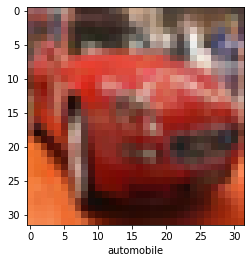

In [8]:
IMG_INDEX = 5

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

##### Layer 1

#### The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We also apply the activation function RELU

##### Layer 2

#### This one will perform max pooling operation using 2x2 samplels and a stride of 2

##### Other Layers

#### The other layers do very similar stuff but take as input the feature map from previous layer

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## Adding dense layers

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## Training the model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10,
                  validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 65s 23ms/step - loss: 1.5214 - accuracy: 0.4462 - val_loss: 1.3203 - val_accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1662 - accuracy: 0.5904 - val_loss: 1.0818 - val_accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0207 - accuracy: 0.6428 - val_loss: 1.0482 - val_accuracy: 0.6337
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9272 - accuracy: 0.6740 - val_loss: 0.9291 - val_accuracy: 0.6783
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8556 - accuracy: 0.7020 - val_loss: 0.9094 - val_accuracy: 0.6803
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8049 - accuracy: 0.7182 - val_loss: 0.9058 - val_accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7554 - accuracy: 0.7359 - val_loss: 0.8739 -

## Evaluating the Model

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc, test_loss, sep='\n')

313/313 - 13s - loss: 0.9343 - accuracy: 0.6905
0.690500020980835
0.9342679977416992


#### We might say that we have a pretty good accuracy regarding the fact that our dataset is considered to be a small one. Some of the best CNN models cosists of milions of images to be created.

In [21]:
predictions = model.predict(test_images)

In [26]:
predictions

array([[ -3.634146  ,  -6.8086815 ,  -2.2468765 , ...,  -4.0162115 ,
          0.25971246,  -2.0586162 ],
       [  3.556698  ,   3.902994  ,  -4.8999286 , ...,  -8.752052  ,
          9.842286  ,   1.6755489 ],
       [ -0.22110116,   0.6767302 ,  -0.6061747 , ...,  -3.6389384 ,
          3.3242776 ,   2.7766368 ],
       ...,
       [ -5.5477037 , -11.515571  ,   2.5317798 , ...,   0.5891656 ,
         -6.1382356 ,  -6.8405285 ],
       [  0.7171809 ,   0.81561786,  -0.05422305, ...,  -2.1586525 ,
         -4.889475  ,  -4.6793323 ],
       [ -5.016321  ,  -3.5313075 ,  -2.258998  , ...,   9.494511  ,
         -5.2091613 ,  -1.5840839 ]], dtype=float32)

In [30]:
predictions = np.asarray(predictions)

In [45]:
predictions[2352]

array([-2.2331107 , -9.776856  ,  3.531047  ,  1.9618999 ,  2.5232134 ,
        0.93107796, -1.0983536 , -0.88071424, -5.9372005 , -4.917748  ],
      dtype=float32)

In [42]:
np.argmax(predictions[2352])

2

In [43]:
print(class_names[np.argmax(predictions[2352])])

bird


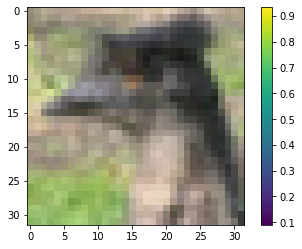

In [44]:
plt.figure()
plt.imshow(test_images[2352])
plt.colorbar()
plt.grid(False)
plt.show()

#### We can use Augmentation if we want to increase the size of our dataset. Augmentation simply means that our image will be multiplied from different perspectives so we can increase the size of our dataset.